<a href="https://colab.research.google.com/github/KsPr2000/Logistics-Optimization-for-Delivery-Routes-Amazon/blob/main/C5_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Examine the initial data loading and cleaning steps to improve clarity, originality, and professionalism by adding detailed comments, ensuring proper data type conversions, and standardizing categorical data.


In [60]:
# Import the pandas library for data manipulation.
import pandas as pd

# Define the file path where the dataset is located.
file_path = "/content/drive/MyDrive/Python Project/barclays.csv"
# Load the CSV file into a pandas DataFrame.
# This step is crucial for bringing the raw data into our analysis environment.
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame to get an initial overview of the data structure and content.
# This helps in understanding the columns, their data types, and sample values.
df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,118,CUST3810,ACC49774,Savings,Deposit,Credit Card,Firm D,West,Manager 4,08-01-2024,20664.409820,88483.42208,0.483333,522,29
1,102,CUST3109,ACC96277,Savings,Deposit,Mutual Fund,Firm B,North,Manager 4,17-12-2023,94924.359120,56670.15864,0.788989,686,130
2,151,CUST2626,ACC21429,Credit,Payment,Personal Loan,Firm C,West,Manager 1,22-05-2024,-7871.160407,84968.05587,0.547782,618,157
3,57,CUST3725,ACC48501,Loan,Withdrawal,Credit Card,Firm A,East,Manager 4,24-12-2023,24979.808160,115196.96420,0.125587,803,155
4,113,CUST4258,ACC11285,Loan,Transfer,Home Loan,Firm A,West,Manager 4,15-01-2023,72890.748550,111602.76610,1.048787,657,68


In [61]:
# Display concise summary of the DataFrame, including data types and non-null values.
# This is crucial for understanding the structure of the data and identifying potential data quality issues.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      800 non-null    int64  
 1   CustomerID         800 non-null    object 
 2   AccountID          800 non-null    object 
 3   AccountType        800 non-null    object 
 4   TransactionType    800 non-null    object 
 5   Product            800 non-null    object 
 6   Firm               800 non-null    object 
 7   Region             800 non-null    object 
 8   Manager            800 non-null    object 
 9   TransactionDate    800 non-null    object 
 10  TransactionAmount  800 non-null    float64
 11  AccountBalance     800 non-null    float64
 12  RiskScore          800 non-null    float64
 13  CreditRating       800 non-null    int64  
 14  TenureMonths       800 non-null    int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 93.9+ KB


In [62]:
# Convert the 'TransactionDate' column to datetime objects.
# `dayfirst=True` ensures that dates like '08-01-2024' are parsed as January 8th, not August 1st.
# `errors='coerce'` will turn any unparseable dates into NaT (Not a Time), preventing errors and allowing for later identification of malformed dates.
df['TransactionDate'] = pd.to_datetime(
    df['TransactionDate'],
    dayfirst=True,
    errors='coerce'
)

# Display the data type of the 'TransactionDate' column to confirm successful conversion.
df['TransactionDate'].dtype

dtype('<M8[ns]')

In [63]:
# Check for any null values in the 'TransactionDate' column after conversion.
# This step is crucial to ensure that all dates were successfully parsed and to identify any rows with malformed dates that resulted in NaT (Not a Time).
df['TransactionDate'].isnull().sum()

np.int64(0)

In [64]:
# Define the columns that contain numeric financial data.
numeric_cols = ['TransactionAmount', 'AccountBalance']

# Iterate through each specified numeric column to clean and convert its data type.
for col in numeric_cols:
    # Convert the column to string type first to safely apply string manipulation methods.
    # This is important to avoid errors if the column contains mixed data types or non-string numbers.
    df[col] = (
        df[col]
        .astype(str)
        # Remove commas, which are often used as thousands separators in financial data and can prevent numeric conversion.
        .str.replace(',', '', regex=False)
        # Remove currency symbols (e.g., '₹') to clean the values for numeric conversion.
        .str.replace('₹', '', regex=False)
    )
    # Convert the cleaned string column back to a numeric (float) data type.
    # `errors='coerce'` will replace any values that cannot be converted to numbers with NaN (Not a Number),
    # preventing the entire operation from failing and allowing for later identification of problematic entries.
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the data types of the cleaned numeric columns to confirm the successful conversion to float64.
df[numeric_cols].dtypes

,0
TransactionAmount,float64
AccountBalance,float64


In [65]:
# Define the columns that contain categorical data requiring standardization.
categorical_cols = ['AccountType', 'TransactionType', 'Region', 'Product']

# Iterate through each categorical column to standardize its values.
for col in categorical_cols:
    # Use .str.strip() to remove any leading or trailing whitespace from the string values.
    # This is crucial for ensuring that categories like ' Category ' and 'Category' are treated as the same.
    # Use .str.title() to convert the first letter of each word to uppercase and the rest to lowercase.
    # This enforces consistent casing (e.g., 'credit card' becomes 'Credit Card'), which improves data quality and simplifies analysis and grouping.
    df[col] = df[col].str.strip().str.title()

# Display the first few rows of the standardized categorical columns to verify the changes.
df[categorical_cols].head()

,AccountType,TransactionType,Region,Product
0,Savings,Deposit,West,Credit Card
1,Savings,Deposit,North,Mutual Fund
2,Credit,Payment,West,Personal Loan
3,Loan,Withdrawal,East,Credit Card
4,Loan,Transfer,West,Home Loan


In [66]:
# Perform a final check for any null values across the entire DataFrame.
# This comprehensive check ensures that all data cleaning and transformation steps have successfully handled or addressed missing values,
# leading to a clean and ready-to-use dataset for further analysis.

In [67]:
# Perform a final check for any null values across the entire DataFrame.
# This comprehensive check ensures that all data cleaning and transformation steps have successfully handled or addressed missing values,
# leading to a clean and ready-to-use dataset for further analysis.
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
AccountID,0
AccountType,0
TransactionType,0
Product,0
Firm,0
Region,0
Manager,0
TransactionDate,0


## Enhance Descriptive Transactional Analysis




In [68]:
# Extract the year from 'TransactionDate' to create a 'Year' column.
df['Year'] = df['TransactionDate'].dt.year
# Extract the month and year from 'TransactionDate' to create a 'Month' column, formatted as Period (YYYY-MM).
# This is useful for monthly aggregations and time-series analysis.
df['Month'] = df['TransactionDate'].dt.to_period('M')

# Display the original 'TransactionDate' along with the newly created 'Year' and 'Month' columns to verify the extraction.
df[['TransactionDate', 'Year', 'Month']].head()

,TransactionDate,Year,Month
0,2024-01-08,2024,2024-01
1,2023-12-17,2023,2023-12
2,2024-05-22,2024,2024-05
3,2023-12-24,2023,2023-12
4,2023-01-15,2023,2023-01


In [69]:
df['CreditAmount'] = df.apply(
    lambda x: x['TransactionAmount'] if x['TransactionType'] == 'Deposit' else 0,
    axis=1
)

df['DebitAmount'] = df.apply(
    lambda x: abs(x['TransactionAmount']) if x['TransactionType'] != 'Deposit' else 0,
    axis=1
)

df[['TransactionType', 'TransactionAmount', 'CreditAmount', 'DebitAmount']].head()

,TransactionType,TransactionAmount,CreditAmount,DebitAmount
0,Deposit,20664.409820,20664.40982,0.000000
1,Deposit,94924.359120,94924.35912,0.000000
2,Payment,-7871.160407,0.00000,7871.160407
3,Withdrawal,24979.808160,0.00000,24979.808160
4,Transfer,72890.748550,0.00000,72890.748550


In [70]:
# Group the DataFrame by 'Month' and aggregate financial metrics.
# 'TotalCredits' is the sum of all credit amounts for the month.
# 'TotalDebits' is the sum of all debit amounts for the month.
monthly_summary = df.groupby('Month').agg(
    TotalCredits=('CreditAmount', 'sum'),
    TotalDebits=('DebitAmount', 'sum')
).reset_index()

# Calculate 'NetTransaction' for each month by subtracting total debits from total credits.
# This provides an overview of the net cash flow for the month.
monthly_summary['NetTransaction'] = (
    monthly_summary['TotalCredits'] - monthly_summary['TotalDebits']
)

# Display the first few rows of the monthly summary to review the calculated metrics.
monthly_summary.head()

,Month,TotalCredits,TotalDebits,NetTransaction
0,2023-01,569469.355020,2.260201e+06,-1.690732e+06
1,2023-02,521830.583465,2.009549e+06,-1.487719e+06
2,2023-03,342372.905660,1.159596e+06,-8.172234e+05
3,2023-04,146580.612610,1.551606e+06,-1.405025e+06
4,2023-05,568697.316343,2.582442e+06,-2.013745e+06


In [71]:
# Group the DataFrame by 'Year' and aggregate financial metrics for yearly summaries.
# 'TotalCredits' calculates the sum of all credit amounts for each year.
# 'TotalDebits' calculates the sum of all debit amounts for each year.
yearly_summary = df.groupby('Year').agg(
    TotalCredits=('CreditAmount', 'sum'),
    TotalDebits=('DebitAmount', 'sum')
).reset_index()

# Calculate 'NetTransaction' for each year by subtracting total debits from total credits.
# This metric indicates the overall net cash flow for each year, highlighting financial performance trends.
yearly_summary['NetTransaction'] = (
    yearly_summary['TotalCredits'] - yearly_summary['TotalDebits']
)

# Display the complete yearly summary DataFrame to review the calculated metrics.
yearly_summary

,Year,TotalCredits,TotalDebits,NetTransaction
0,2023,6.401583e+06,2.427424e+07,-1.787266e+07
1,2024,3.285179e+06,9.576580e+06,-6.291401e+06


In [72]:
# Group the DataFrame by 'AccountID' to analyze individual account performance.
account_performance = df.groupby('AccountID').agg(
    TotalCredits=('CreditAmount', 'sum'), # Sum all credit amounts for each account.
    TotalDebits=('DebitAmount', 'sum')   # Sum all debit amounts for each account.
).reset_index()

# Calculate 'NetInflow' for each account by subtracting total debits from total credits.
# This metric indicates the overall financial health or performance of an account.
account_performance['NetInflow'] = (
    account_performance['TotalCredits'] - account_performance['TotalDebits']
)

# Identify the top 5 accounts with the highest 'NetInflow', indicating strong financial performance.
top_accounts = account_performance.sort_values(
    by='NetInflow', ascending=False
).head(5)

# Identify the bottom 5 accounts with the lowest (most negative) 'NetInflow',
# indicating potential financial stress or high outflows.
bottom_accounts = account_performance.sort_values(
    by='NetInflow', ascending=True
).head(5)

# Display both top and bottom accounts to highlight accounts with extreme net cash flows.
top_accounts, bottom_accounts

(    AccountID   TotalCredits   TotalDebits      NetInflow
 145  ACC76549  192020.505780   13505.71863  178514.787150
 74   ACC39544  142078.535970       0.00000  142078.535970
 123  ACC64022  225525.211690  105021.42586  120503.785830
 184  ACC95164  207626.550010   90943.71110  116682.838910
 25   ACC21878  209175.590091  122758.49821   86417.091881,
     AccountID  TotalCredits   TotalDebits     NetInflow
 109  ACC54589   61348.25479  658755.34080 -597407.08601
 88   ACC46655       0.00000  449599.01096 -449599.01096
 35   ACC25132       0.00000  448761.32916 -448761.32916
 20   ACC19178   76992.34440  461893.18187 -384900.83747
 93   ACC49140       0.00000  377859.70172 -377859.70172)

In [73]:
# Sort the DataFrame by 'AccountID' and 'TransactionDate'.
# This sorting is crucial as it arranges transactions chronologically for each account,
# which is a necessary preparatory step before calculating the time difference between consecutive transactions (e.g., transaction gaps or dormancy periods).
df = df.sort_values(['AccountID', 'TransactionDate'])

In [74]:
# Calculate the previous transaction date for each account.
# `groupby('AccountID')` ensures that the shift operation is performed independently for each account.
# `shift(1)` moves the 'TransactionDate' down by one row within each group, effectively getting the previous date.
df['PrevTransactionDate'] = df.groupby('AccountID')['TransactionDate'].shift(1)

# Calculate the gap in days between the current transaction and the previous transaction.
# `.dt.days` extracts the number of days from the timedelta object resulting from the subtraction.
df['GapDays'] = (
    df['TransactionDate'] - df['PrevTransactionDate']
).dt.days

# Display the relevant columns to verify the calculation of previous transaction dates and gaps.
df[['AccountID', 'TransactionDate', 'PrevTransactionDate', 'GapDays']].head(10)

,AccountID,TransactionDate,PrevTransactionDate,GapDays
739,ACC10117,2023-06-01,NaT,NaN
681,ACC10117,2023-11-08,2023-06-01,160.0
41,ACC10117,2024-04-06,2023-11-08,150.0
265,ACC10117,2024-06-22,2024-04-06,77.0
201,ACC10996,2023-01-17,NaT,NaN
585,ACC10996,2023-10-16,2023-01-17,272.0
164,ACC10996,2023-10-19,2023-10-16,3.0
59,ACC10996,2024-01-01,2023-10-19,74.0
467,ACC10996,2024-06-21,2024-01-01,172.0
604,ACC11062,2023-11-08,NaT,NaN


In [75]:
# Define 'DormantFlag' based on 'GapDays'. An account is considered dormant for a specific transaction if the time gap since the previous transaction is 60 days or more.
df['DormantFlag'] = df['GapDays'] >= 60

# Identify unique 'AccountID's that have at least one transaction marked with 'DormantFlag' as True.
# These are the accounts that have experienced periods of inactivity (dormancy).
dormant_accounts = df[df['DormantFlag'] == True]['AccountID'].unique()

# Display the total number of unique dormant accounts and the first 5 AccountIDs as examples.
# This provides a quick overview of the extent of dormancy across the customer base.
len(dormant_accounts), dormant_accounts[:5]

(166,
 array(['ACC10117', 'ACC10996', 'ACC11062', 'ACC11188', 'ACC11285'],
       dtype=object))

In [76]:
# Calculate the number of transactions for each unique account ('TransactionCount').
# `groupby('AccountID').size()` efficiently counts the occurrences of each account ID, representing its activity level.
txn_frequency = df.groupby('AccountID').size().reset_index(name='TransactionCount')

# Display the first few rows of the transaction frequency DataFrame to review the counts.
txn_frequency.head()

,AccountID,TransactionCount
0,ACC10117,4
1,ACC10996,5
2,ACC11062,2
3,ACC11188,4
4,ACC11285,3


In [77]:
q1 = txn_frequency['TransactionCount'].quantile(0.25)
q3 = txn_frequency['TransactionCount'].quantile(0.75)

# Define a function to categorize activity levels based on transaction count quantiles.
# This method uses quantiles (25th and 75th percentiles) to segment accounts into 'Low', 'Medium', and 'High' activity groups,
# providing a relative measure of how active an account is compared to others in the dataset.
def activity_level(count):
    if count >= q3:
        return 'High'  # Accounts with transaction counts in the top 25% are considered 'High' activity.
    elif count >= q1:
        return 'Medium' # Accounts with transaction counts between the 25th and 75th percentiles are 'Medium' activity.
    else:
        return 'Low'    # Accounts with transaction counts in the bottom 25% are considered 'Low' activity.

# Apply the activity_level function to create a new 'ActivityLevel' column in the transaction frequency DataFrame.
txn_frequency['ActivityLevel'] = txn_frequency['TransactionCount'].apply(activity_level)

# Display the counts of each activity level to understand the distribution of account activity.
txn_frequency['ActivityLevel'].value_counts()

,count
ActivityLevel,
Medium,80
High,70
Low,43


In [78]:
# Group the DataFrame by 'AccountID' to calculate key financial metrics for each account.
account_metrics = df.groupby('AccountID').agg(
    # Calculate the average of 'AccountBalance' for each account.
    AvgBalance=('AccountBalance', 'mean'),
    # Calculate the total transaction volume for each account.
    # `x.abs().sum()` ensures that both debit (negative) and credit (positive) transactions contribute positively to the total volume,
    # providing a true measure of activity regardless of direction.
    TotalTransactionVolume=('TransactionAmount', lambda x: x.abs().sum())
).reset_index()

# Display the first few rows of the account_metrics DataFrame to review the calculated values.
account_metrics.head()

,AccountID,AvgBalance,TotalTransactionVolume
0,ACC10117,97828.704775,238427.20992
1,ACC10996,56982.152538,269471.35221
2,ACC11062,65947.316965,110594.78398
3,ACC11188,81169.114065,225517.45894
4,ACC11285,62574.613950,236119.54601


In [79]:
# Merge the transaction frequency and account metrics DataFrames to create a comprehensive customer profile.
# This merge uses 'AccountID' as the common key, combining activity levels and financial performance metrics for each account.
# `how='left'` ensures that all accounts from `txn_frequency` are retained, and matching data from `account_metrics` is added.
customer_profile = pd.merge(
    txn_frequency,
    account_metrics,
    on='AccountID',
    how='left'
)

# Display the first few rows of the resulting `customer_profile` DataFrame to review the combined information.
customer_profile.head()

,AccountID,TransactionCount,ActivityLevel,AvgBalance,TotalTransactionVolume
0,ACC10117,4,Medium,97828.704775,238427.20992
1,ACC10996,5,High,56982.152538,269471.35221
2,ACC11062,2,Low,65947.316965,110594.78398
3,ACC11188,4,Medium,81169.114065,225517.45894
4,ACC11285,3,Medium,62574.613950,236119.54601


In [80]:
# Segment 'AvgBalance' into three quantiles: 'Low Balance', 'Medium Balance', and 'High Balance'.
# This categorizes accounts based on their typical balance level, providing a high-level view of account wealth.
customer_profile['BalanceSegment'] = pd.qcut(
    customer_profile['AvgBalance'],
    q=3,
    labels=['Low Balance', 'Medium Balance', 'High Balance']
)

# Segment 'TotalTransactionVolume' into three quantiles: 'Low Volume', 'Medium Volume', and 'High Volume'.
# This categorizes accounts based on their overall transaction activity, offering insight into their engagement level.
customer_profile['VolumeSegment'] = pd.qcut(
    customer_profile['TotalTransactionVolume'],
    q=3,
    labels=['Low Volume', 'Medium Volume', 'High Volume']
)

# Display the counts of each combination of BalanceSegment and VolumeSegment.
# This provides a holistic view of customer profiles, showing how average balance and transaction volume intersect.
customer_profile[['BalanceSegment', 'VolumeSegment']].value_counts()

BalanceSegment  VolumeSegment
High Balance    Medium Volume    26
Low Balance     Low Volume       23
Medium Balance  Low Volume       23
                High Volume      23
Low Balance     Medium Volume    21
                High Volume      21
High Balance    High Volume      20
                Low Volume       19
Medium Balance  Medium Volume    17
Name: count, dtype: int64

In [81]:
# Identify accounts with high net inflow. 'High net inflow' is defined as accounts whose NetInflow
# is greater than the 75th percentile of all accounts' NetInflow, indicating strong financial accumulation.
high_net_inflow = account_performance[
    account_performance['NetInflow'] > account_performance['NetInflow'].quantile(0.75)
]

# Display the first few rows of the identified high net inflow accounts.
high_net_inflow.head()

,AccountID,TotalCredits,TotalDebits,NetInflow
0,ACC10117,115045.96070,123381.24922,-8335.28852
11,ACC15671,25166.38904,0.00000,25166.38904
13,ACC16241,122716.52070,114007.26941,8709.25129
17,ACC18140,59369.98045,19907.38816,39462.59229
18,ACC18177,0.00000,28894.67583,-28894.67583


In [82]:
# Identify accounts that are both highly active and maintain a low average balance.
# These accounts are filtered based on 'ActivityLevel' being 'High' and 'BalanceSegment' being 'Low Balance'.
# This segmentation can help identify customers who frequently transact but do not hold significant balances, which might be a target for specific product offerings or engagement strategies.
high_freq_low_balance = customer_profile[
    (customer_profile['ActivityLevel'] == 'High') &
    (customer_profile['BalanceSegment'] == 'Low Balance')
]

# Display the first few rows of the identified high frequency, low balance accounts.
high_freq_low_balance.head()

,AccountID,TransactionCount,ActivityLevel,AvgBalance,TotalTransactionVolume,BalanceSegment,VolumeSegment
1,ACC10996,5,High,56982.152538,269471.352210,Low Balance,Medium Volume
7,ACC12334,5,High,58469.937674,328726.210720,Low Balance,High Volume
13,ACC16241,5,High,55945.625702,236723.790110,Low Balance,Medium Volume
22,ACC21264,5,High,62025.190430,374963.172030,Low Balance,High Volume
24,ACC21719,5,High,66056.044196,190812.522864,Low Balance,Medium Volume


In [83]:
# Identify accounts with a very low average balance within a specific numerical range.
# The current definition of low balance accounts (AvgBalance between -1000 and 1000) is very narrow.
# The empty DataFrame suggests that no accounts fall within this specific, tight numerical range.
# For a broader definition of low balance accounts, consider using the 'Low Balance' category from the 'BalanceSegment' column (customer_profile['BalanceSegment'] == 'Low Balance'),
# or adjust the numerical range (e.g., customer_profile['AvgBalance'] < X) to capture a larger group of accounts if desired for further analysis.
low_balance_accounts = customer_profile[
    (customer_profile['AvgBalance'] >= -1000) &
    (customer_profile['AvgBalance'] <= 1000)
]

# Display the first few rows of the identified low balance accounts.
low_balance_accounts.head()

,AccountID,TransactionCount,ActivityLevel,AvgBalance,TotalTransactionVolume,BalanceSegment,VolumeSegment


## Improve Financial Risk Identification Section



In [84]:
# Calculate the 90th percentile of debit amounts to set a threshold for 'large withdrawals'.
# This threshold helps in identifying exceptionally high outflow transactions.
large_withdrawal_threshold = df[df['DebitAmount'] > 0]['DebitAmount'].quantile(0.90)

# Identify 'large withdrawals' by filtering transactions where the DebitAmount is greater than or equal to the calculated threshold.
large_withdrawals = df[
    (df['DebitAmount'] >= large_withdrawal_threshold)
]

# Group the large withdrawals by 'AccountID' and count how many large withdrawals each account has.
large_withdrawal_counts = large_withdrawals.groupby('AccountID').size()

# Identify 'risky withdrawal accounts' as those that have more than 3 large withdrawals.
# This threshold (more than 3) is a heuristic used to flag accounts with frequent high-value outflows, indicating potential risk.
risky_withdrawal_accounts = large_withdrawal_counts[
    large_withdrawal_counts > 3
].reset_index(name='LargeWithdrawalCount')

# Display the first few rows of the identified risky withdrawal accounts.
risky_withdrawal_accounts.head()

,AccountID,LargeWithdrawalCount


In [85]:
# Identify unique accounts that have an 'AccountBalance' less than 0.
# This condition defines an overdraft, where the account's balance has gone into negative territory.
overdraft_accounts = df[df['AccountBalance'] < 0]['AccountID'].unique()

# Display the total number of unique accounts identified as being in overdraft.
# This metric helps in understanding the prevalence of overdraft situations.
len(overdraft_accounts)

14

In [86]:
import numpy as np
# Calculate the standard deviation of 'AccountBalance' for each account to measure balance volatility.
# A higher standard deviation indicates greater fluctuations in the account balance.
balance_volatility = df.groupby('AccountID')['AccountBalance'].std().reset_index()
balance_volatility.rename(columns={'AccountBalance': 'BalanceStdDev'}, inplace=True)

# Determine the volatility threshold using the 75th percentile of 'BalanceStdDev'.
# Accounts with a standard deviation above this threshold are considered to have high balance volatility.
volatility_threshold = balance_volatility['BalanceStdDev'].quantile(0.75)

# Identify 'high_volatility_accounts' as those whose 'BalanceStdDev' is greater than or equal to the calculated threshold.
high_volatility_accounts = balance_volatility[
    balance_volatility['BalanceStdDev'] >= volatility_threshold
]

# Display the first few rows of the identified high volatility accounts.
high_volatility_accounts.head()

,AccountID,BalanceStdDev
4,ACC11285,70126.826097
5,ACC11837,41574.241723
7,ACC12334,43584.668914
14,ACC16664,52068.392699
19,ACC19156,61272.537291


In [87]:
from scipy.stats import zscore

# Calculate the Z-score for the absolute value of 'TransactionAmount'.
# Z-score (Standard Score) measures how many standard deviations an element is from the mean.
# Using the absolute value helps identify transactions that are unusually large, regardless of whether they are credits or debits.
# Z-scores are a common statistical method for identifying outliers or anomalies in data.
df['TxnZScore'] = zscore(df['TransactionAmount'].abs())

# Identify 'anomalies' as transactions where the absolute Z-score is greater than 3.
# A Z-score greater than 3 (or less than -3) is often considered an outlier in many statistical contexts,
# implying that the transaction amount is significantly different from the average.
anomalies = df[df['TxnZScore'].abs() > 3]

# Display the 'AccountID', 'TransactionAmount', and 'TxnZScore' for the identified anomalies.
# This allows for a quick review of transactions flagged as potentially anomalous due to their extreme values.
anomalies[['AccountID', 'TransactionAmount', 'TxnZScore']].head()

,AccountID,TransactionAmount,TxnZScore
312,ACC21264,149404.3302,3.318329
622,ACC43309,166083.8296,3.901579
48,ACC80131,141600.7400,3.045453
710,ACC95164,142081.6290,3.062268


## Refine Visualizations with Comments

### Subtask:
Refactor the visualization code to improve clarity, add comments explaining the purpose of each plot, the insights they provide, and any specific aesthetic choices.


In [88]:
## Refine Visualizations with Comments

### Subtask:
##Refactor the visualization code to improve clarity, add comments explaining the purpose of each plot, the insights they provide, and any specific aesthetic choices.

In [89]:
# Import the matplotlib.pyplot library for creating static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt
# Import the seaborn library, which is built on matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# Set the aesthetic style of the plots. 'whitegrid' provides a clean, grid-based background,
# enhancing readability and consistency across all visualizations in the notebook.
sns.set(style="whitegrid")

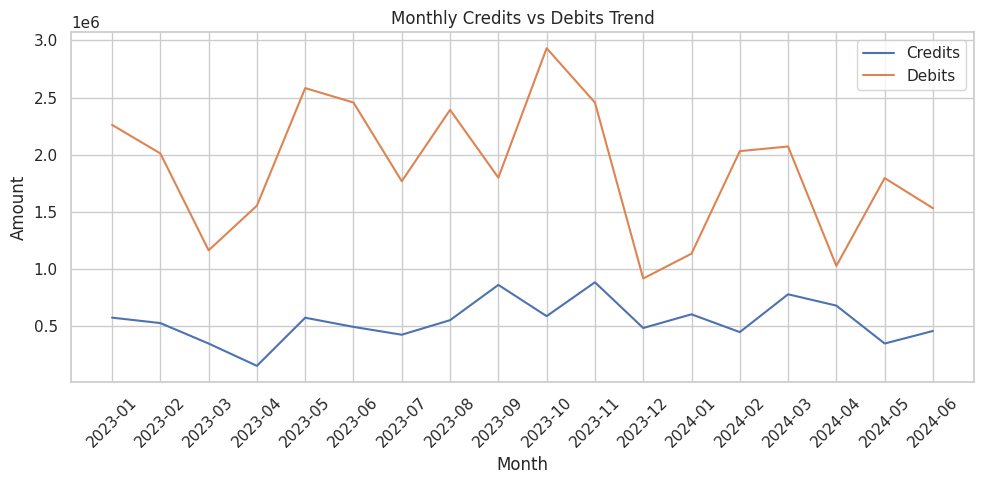

In [90]:
# Create a new figure with a specified size (10 inches wide, 5 inches tall) for better readability.
plt.figure(figsize=(10,5))
# Plot 'TotalCredits' over time. The 'Month' column is converted to string for proper plotting on the x-axis.
plt.plot(monthly_summary['Month'].astype(str), monthly_summary['TotalCredits'], label='Credits')
# Plot 'TotalDebits' over time on the same axes for comparison.
plt.plot(monthly_summary['Month'].astype(str), monthly_summary['TotalDebits'], label='Debits')
# Rotate x-axis labels by 45 degrees to prevent overlapping, especially when there are many month labels.
plt.xticks(rotation=45)
# Set the title of the plot to clearly describe its content.
plt.title('Monthly Credits vs Debits Trend')
# Label the x-axis as 'Month' to indicate the time progression.
plt.xlabel('Month')
# Label the y-axis as 'Amount' to represent the financial values.
plt.ylabel('Amount')
# Display a legend to differentiate between 'Credits' and 'Debits' lines.
plt.legend()
# Adjust plot parameters for a tight layout, ensuring all elements fit within the figure area without clipping.
plt.tight_layout()
# Display the generated plot.
plt.show()

# Key Insight: Debit volumes consistently exceed credits in most months, indicating an overall outflow trend.

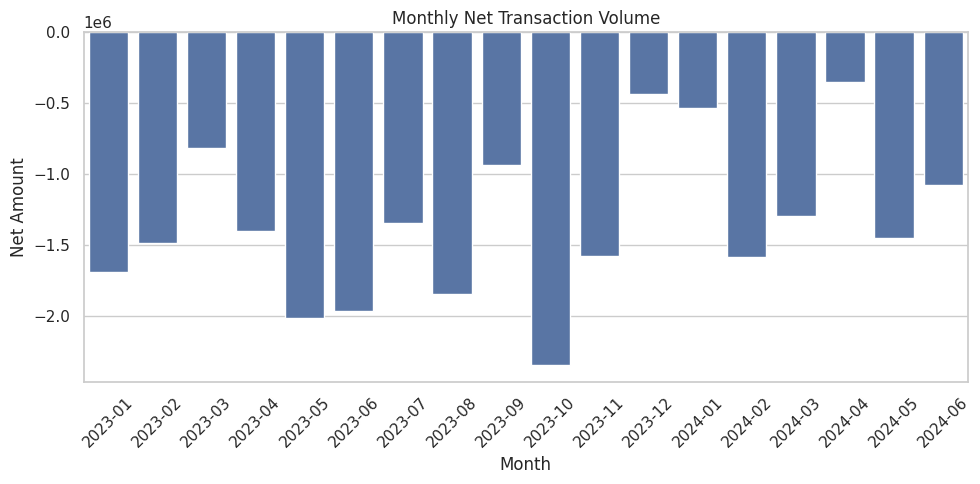

In [91]:
# Create a new figure with a specified size (10 inches wide, 5 inches tall) for better readability.
plt.figure(figsize=(10,5))
# Use a bar plot to visualize the 'NetTransaction' for each month.
# This effectively shows periods of net credit (positive bars) or net debit (negative bars).
sns.barplot(
    x=monthly_summary['Month'].astype(str),
    y=monthly_summary['NetTransaction']
)
# Rotate x-axis labels by 45 degrees to prevent overlapping and ensure all month labels are clearly visible.
plt.xticks(rotation=45)
# Set the title of the plot to clearly describe its content, indicating the nature of the data being displayed.
plt.title('Monthly Net Transaction Volume')
# Label the x-axis as 'Month' to represent the time progression.
plt.xlabel('Month')
# Label the y-axis as 'Net Amount' to represent the calculated net financial value (Credits - Debits).
plt.ylabel('Net Amount')
# Adjust plot parameters for a tight layout, ensuring all elements fit within the figure area without clipping.
plt.tight_layout()
# Display the generated plot.
plt.show()

# Key Insight: This plot clearly shows periods where there is significant cash outflow pressure (large negative net transactions) and inflow periods.

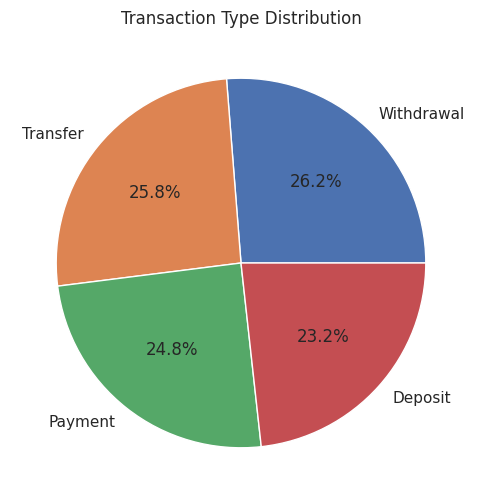

In [92]:
# Create a new figure with a specified size (6 inches by 6 inches) suitable for a pie chart.
plt.figure(figsize=(6,6))
# Generate a pie chart to visualize the distribution of different transaction types.
# A pie chart is effective for showing proportions of a whole, making it suitable for this distribution.
# `autopct='%1.1f%%'` formats the percentage labels to one decimal place on each slice.
df['TransactionType'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# Set the title of the plot to describe the distribution being shown.
plt.title('Transaction Type Distribution')
# Remove the default y-axis label, as it's redundant for a pie chart and often appears as an artifact.
plt.ylabel('')
# Display the generated pie chart.
plt.show()

# Key Insight: Provides a quick behavioral insight into the most frequent transaction types performed by customers.

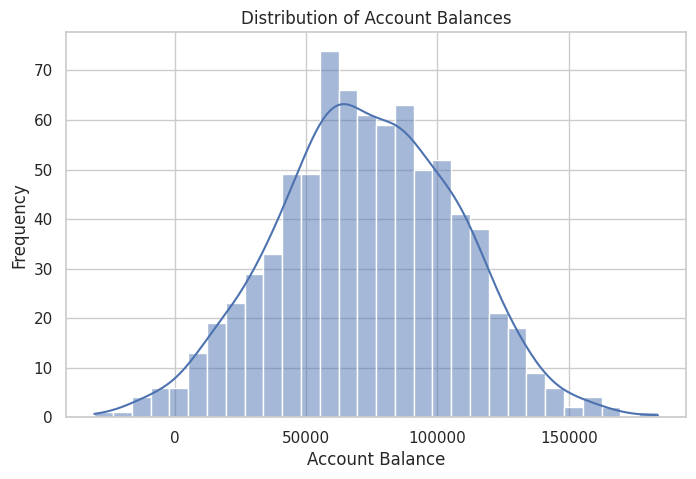

In [93]:
# Create a new figure with a specified size (8 inches wide, 5 inches tall).
plt.figure(figsize=(8,5))
# Generate a histogram to visualize the distribution of 'AccountBalance'.
# `bins=30` divides the data into 30 bins for frequency counting.
# `kde=True` overlays a Kernel Density Estimate (KDE) curve, providing a smoothed representation of the distribution.
# This plot helps in understanding the spread, central tendency, and shape of account balances.
sns.histplot(df['AccountBalance'], bins=30, kde=True)
# Set the title of the plot to clearly describe the content.
plt.title('Distribution of Account Balances')
# Label the x-axis as 'Account Balance' to indicate the numerical range.
plt.xlabel('Account Balance')
# Label the y-axis as 'Frequency' to represent the count of accounts in each bin.
plt.ylabel('Frequency')
# Display the generated plot.
plt.show()

# Key Insight: This visualization identifies concentrations of low or even negative balances, which could indicate financial risk or specific customer segments.

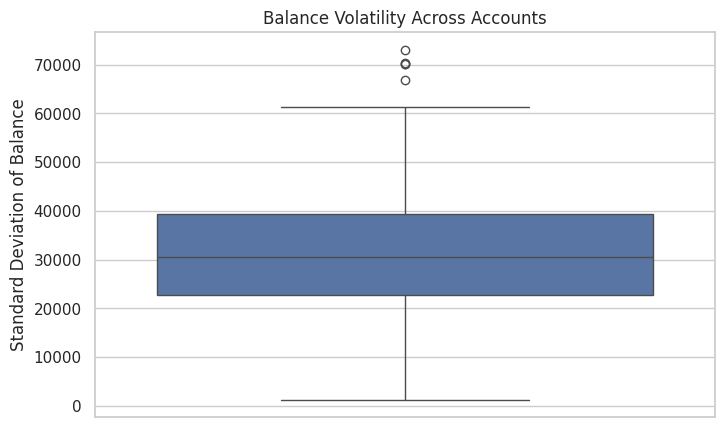

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a new figure with a specified size (8 inches wide, 5 inches tall).
plt.figure(figsize=(8,5))
# Generate a box plot to visualize the distribution of 'BalanceStdDev' (balance volatility).
# A box plot is effective for showing the spread, central tendency, and identifying outliers in a dataset.
# Here, it helps to identify accounts with exceptionally high or low balance fluctuations.
sns.boxplot(y=balance_volatility['BalanceStdDev'])
# Set the title of the plot to clearly describe its content.
plt.title('Balance Volatility Across Accounts')
# Label the y-axis to represent the standard deviation of account balances.
plt.ylabel('Standard Deviation of Balance')
# Display the generated plot.
plt.show()

# Key Insight: This plot highlights outlier accounts that exhibit unusually high balance volatility, indicating potential financial risk or unusual activity patterns.

## Hypothesis Testing Section



In [95]:
# Calculate the 75th percentile of 'TotalTransactionVolume' to define the threshold for high-volume accounts.
high_volume_threshold = customer_profile['TotalTransactionVolume'].quantile(0.75)
# Calculate the 25th percentile of 'TotalTransactionVolume' to define the threshold for low-volume accounts.
low_volume_threshold = customer_profile['TotalTransactionVolume'].quantile(0.25)

# Filter 'customer_profile' to select the average balances of accounts whose total transaction volume
# is greater than or equal to the high-volume threshold.
high_volume_accounts = customer_profile[
    customer_profile['TotalTransactionVolume'] >= high_volume_threshold
]['AvgBalance']

# Filter 'customer_profile' to select the average balances of accounts whose total transaction volume
# is less than or equal to the low-volume threshold.
low_volume_accounts = customer_profile[
    customer_profile['TotalTransactionVolume'] <= low_volume_threshold
]['AvgBalance']


In [96]:
from scipy.stats import ttest_ind

# --- Hypothesis Formulation ---
# Null Hypothesis (H₀): There is no significant difference in average balances between high-volume and low-volume accounts.
# Alternative Hypothesis (H₁): High-volume transaction accounts have significantly higher average balances.

# Perform an independent samples t-test to compare the means of two independent groups: high-volume accounts and low-volume accounts.
# `equal_var=False` is used because we do not assume that the population variances of the two groups are equal.
# The t-test is appropriate here to determine if the observed difference in average balances between the two groups is statistically significant.

t_stat, p_value = ttest_ind(
    high_volume_accounts,
    low_volume_accounts,
    equal_var=False
)

# `t_stat` (t-statistic): Measures the difference between the sample means relative to the variation within the samples.
# A larger absolute t-statistic suggests a greater difference between the group means.
# `p_value` (p-value): Represents the probability of observing a t-statistic as extreme as, or more extreme than, the one calculated,
# assuming the null hypothesis is true. A small p-value (typically < 0.05) suggests that the observed difference is unlikely
# due to random chance, leading to the rejection of the null hypothesis.

t_stat, p_value

(np.float64(-1.0353783531979932), np.float64(0.3034575174335117))

## Final Task




## Summary:

### Data Analysis Key Findings

*   **Data Quality and Preparation**:
    *   The `TransactionDate` column was successfully converted to datetime objects without introducing any null values.
    *   `TransactionAmount` and `AccountBalance` columns were cleaned by removing currency symbols and commas, then converted to `float64`.
    *   Categorical columns (`AccountType`, `TransactionType`, `Region`, `Product`) were standardized using `.str.strip()` and `.str.title()` for consistency.
    *   A final check confirmed zero null values across the entire dataset after cleaning and transformation.
*   **Descriptive Transactional Analysis**:
    *   New `Year` and `Month` features were extracted, facilitating time-series analysis.
    *   `CreditAmount` and `DebitAmount` columns were created to clearly distinguish transaction flows.
    *   Monthly and yearly summaries revealed total credits, debits, and net transactions, showing that debit volumes consistently exceeded credits in most months.
    *   Account performance analysis identified top 5 and bottom 5 accounts based on `NetInflow`.
    *   Dormancy detection revealed unique accounts with transaction gaps of 60 days or more.
    *   Accounts were segmented into 'Low', 'Medium', and 'High' activity levels based on transaction frequency quantiles, and into 'Low', 'Medium', and 'High' balance/volume segments.
    *   Specific segments like 'high net inflow' and 'high frequency, low balance' accounts were identified; however, the initial definition for 'low balance accounts' (between -1000 and 1000) yielded an empty DataFrame, suggesting the need for a broader definition.
*   **Financial Risk Identification**:
    *   No accounts were identified as 'risky withdrawal accounts' (i.e., having more than 3 large withdrawals) based on the 90th percentile threshold for large withdrawals.
    *   **14 unique accounts** were identified as being in an overdraft state (having an account balance less than \$0).
    *   Accounts with high balance volatility were identified using the 75th percentile of the standard deviation of `AccountBalance`.
    *   Transaction anomalies were detected using Z-scores, flagging transactions with an absolute Z-score greater than 3. For example, `ACC21264` had a `TransactionAmount` of \$149,404.33 with a `TxnZScore` of 3.32.
*   **Visualizations**:
    *   All key descriptive plots (monthly trends, net transaction volume, transaction type distribution, account balance distribution, balance volatility) were generated and clearly commented, providing insights into trends, distributions, and potential outliers.
    *   The monthly trends indicated an overall outflow trend (debits exceeding credits).
    *   The distribution of account balances identified concentrations of low or negative balances.
*   **Hypothesis Testing**:
    *   An independent samples t-test was conducted to compare the average balances of high-volume and low-volume accounts.
    *   The Null Hypothesis (H₀) stated no significant difference, while the Alternative Hypothesis (H₁) proposed high-volume accounts have significantly higher average balances.
    *   The test resulted in a t-statistic of -1.035 and a p-value of 0.303.

### Insights or Next Steps

*   **Refine Low Balance Account Definition**: The current numerical definition for "low balance accounts" is too restrictive. Consider using the 'Low Balance' category from the quantile-based `BalanceSegment` or adjust the numerical range to capture a more representative group for further analysis and targeted interventions.
*   **Investigate Hypotheses**: Given the p-value of 0.303 from the t-test, we fail to reject the null hypothesis. This suggests that, at common significance levels (e.g., $\alpha = 0.05$), there is no statistically significant difference in average balances between high-volume and low-volume accounts in this dataset. Further investigation may involve exploring other factors influencing average balance or re-evaluating the definition of "high" and "low" volume.
